In [1]:
import numpy as np
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from custom_callbacks import SegmentationModelCallback
from segmentation_model import BSS
from generators import IsGenerator
from tensorflow import reduce_mean

In [2]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [3]:
segment_model = BSS(input_sh=(128, 128, 3))
segment_model.compile(optimizer=Adam(), loss=BinaryCrossentropy())


In [4]:
images_path = "c:\\Users\\1\\Desktop\\drone_solution_meta\\segmentation_data\\test_new\\images"
segmentation_path = "c:\\Users\\1\\Desktop\\drone_solution_meta\\segmentation_data\\test_new\\segment_masks"
generator = IsGenerator(images_path=images_path, segmentation_path=segmentation_path, input_sz=(128, 128))

In [44]:
images = []
segims = []
for sample_n, (image, segim) in enumerate(iter(generator)):

    if sample_n == 1000:
        break

    images.append(image)
    segims.append(segim)

images = np.asarray(images)
segims = np.asarray(segims)

images = images / 255.0
segims = segims / 255.0
    

In [45]:
segims = reduce_mean(segims, axis=-1)
segims = segims.numpy()

In [41]:
images.shape

(100, 128, 128, 3)

In [34]:
def show_samples(data, samples_n=25):

    samples_r = int(np.sqrt(samples_n))
    fig, axis = plt.subplots(nrows=samples_r, ncols=samples_r)

    sample_n = 0
    for i in range(samples_r):
        for j in range(samples_r):
            
            axis[i, j].imshow(data[sample_n], cmap="jet")
            sample_n += 1
    
    plt.show()
    

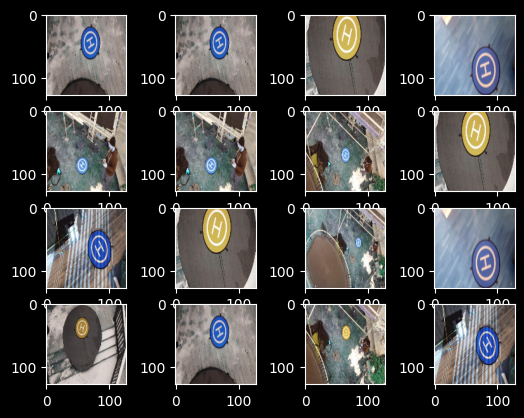

In [35]:
show_samples(images, samples_n=16)

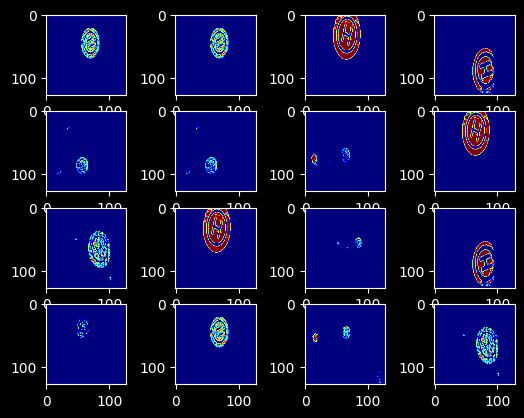

In [37]:
show_samples(segims, samples_n=16)

In [47]:
print(segims.shape)

(100, 128, 128)


In [46]:
random_idx = np.random.randint(0, images.shape[0], 100)
images = images[random_idx]
segims = segims[random_idx]

In [48]:
seg_callback = SegmentationModelCallback(model=segment_model, run_folder="C:\\Users\\1\\Desktop\\drone_solution_meta\\segmentation_model_logs", train_data=images, samples_n=25)
segment_model.fit(images, segims, epochs=100, batch_size=32, callbacks=[seg_callback])
segment_model.save_weights(filepath="c:\\\\Users\\\\1\\\\Desktop\\\\drone_solution_meta\\\\models_weights\\\\segmentation_model.weights.weights.h5")


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - segmentation_loss: 0.2546
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - segmentation_loss: 0.2652
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - segmentation_loss: 0.2470
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - segmentation_loss: 0.2394
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - segmentation_loss: 0.2131
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - segmentation_loss: 0.2184
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - segmentation_loss: 0.2379
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - segmentation_loss: 0.2658
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - segmentation_loss: 0.2615
Epoch 10/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - segmentation_loss: 0.2080

KeyboardInterrupt: 

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


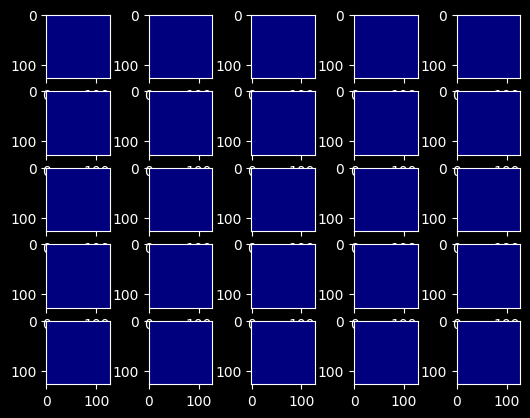

In [13]:
segmented_images = segment_model.predict(images[:100])
show_samples(segmented_images, samples_n=25)

In [16]:
segment_model.model.summary()
conv_layers = [layer for layer in segment_model.model.layers if "conv" in layer.name]
print(len(conv_layers))

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      3,584 │ input_layer[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d   │ (None, 64, 64,    │          0 │ activation[0][0]  │
│ (AveragePooling2D)  │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ average_pooling2… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │    147,584 │ activation_1[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ conv2d_1[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      8,256 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │      8,320 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 64, 64,    │          0 │ dense_1[0][0],    │
│                     │ 128)              │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ multiply[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d_1 │ (None, 32, 32,    │          0 │ activation_2[0][… │
│ (AveragePooling2D)  │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ average_pooling2… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 608,641 (2.32 MB)

 Trainable params: 605,825 (2.31 MB)

 Non-trainable params: 2,816 (11.00 KB)

10


In [18]:
import cv2

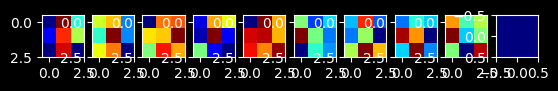

In [24]:
fig, axis = plt.subplots(ncols=10)
for layer_n, layer in enumerate(conv_layers):

    weights = layer.get_weights()[0]
    weights = reduce_mean(weights, axis=-1)
    weights = reduce_mean(weights, axis=-1)

    
    axis[layer_n].imshow(weights, cmap="jet")

plt.show()

    